In [45]:
import ccxt
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import talib

import dateutil.parser
from talib import RSI

In [46]:
millis = {
    '1m': 60_000,
    '1h': 60_000 * 60,
    '1d': 60_000 * 1440
}

sym = 'XBTUSD'
level = '1m'
limit = 1000
since = None # get latest OHLC data

api = ccxt.bitmex()

candles = []

while True:     
    
    
    response = api.fetchOHLCV(
        sym,
        since=since,
        limit=limit,
        timeframe=level,
    )
    candles = response + candles
    min_time = min(x[0] for x in response)    
    since = min_time - limit * millis[level]
    
    if len(candles) >= 20_000:
        break
    

columns = 'time open high low close vol'.split()
df = pd.DataFrame(candles, columns=columns)

df = df.drop_duplicates()
df = df.sort_values('time')
df = df.reset_index(drop=True)

def to_datetime(x):
    return datetime.datetime.fromtimestamp(x / 1000)

df['time'] = df['time'].apply(to_datetime)
df

,time,open,high,low,close,vol
0,2023-04-15 17:03:00,30390.5,30392.0,30387.5,30390.5,123400.0
1,2023-04-15 17:04:00,30390.5,30395.5,30388.0,30395.5,1200.0
2,2023-04-15 17:05:00,30395.5,30409.5,30396.0,30409.5,245400.0
3,2023-04-15 17:06:00,30409.5,30424.5,30409.5,30421.0,273800.0
4,2023-04-15 17:07:00,30421.0,30421.0,30414.0,30417.5,228000.0
...,...,...,...,...,...,...
19995,2023-04-29 14:18:00,29326.5,29326.0,29326.0,29326.0,100.0
19996,2023-04-29 14:19:00,29326.0,29326.0,29322.5,29322.5,238800.0
19997,2023-04-29 14:20:00,29322.5,29321.5,29318.0,29318.0,175900.0
19998,2023-04-29 14:21:00,29318.0,29317.0,29312.0,29312.0,175200.0


**Calculate RSI TA-Lib package**  
- Use default 14 time period for Relative Strength Index (RSI)

In [47]:
df['rsi'] = RSI(df['close'])
df.head(20)

,time,open,high,low,close,vol,rsi
0,2023-04-15 17:03:00,30390.5,30392.0,30387.5,30390.5,123400.0,NaN
1,2023-04-15 17:04:00,30390.5,30395.5,30388.0,30395.5,1200.0,NaN
2,2023-04-15 17:05:00,30395.5,30409.5,30396.0,30409.5,245400.0,NaN
3,2023-04-15 17:06:00,30409.5,30424.5,30409.5,30421.0,273800.0,NaN
4,2023-04-15 17:07:00,30421.0,30421.0,30414.0,30417.5,228000.0,NaN
5,2023-04-15 17:08:00,30417.5,30421.5,30418.5,30421.5,4600.0,NaN
6,2023-04-15 17:09:00,30421.5,30429.0,30421.5,30426.0,77000.0,NaN
7,2023-04-15 17:10:00,30426.0,30426.5,30422.5,30422.5,184800.0,NaN
8,2023-04-15 17:11:00,30422.5,30431.5,30416.0,30431.5,58400.0,NaN
9,2023-04-15 17:12:00,30431.5,30439.0,30430.0,30430.0,522300.0,NaN


**Distribution of RSI**

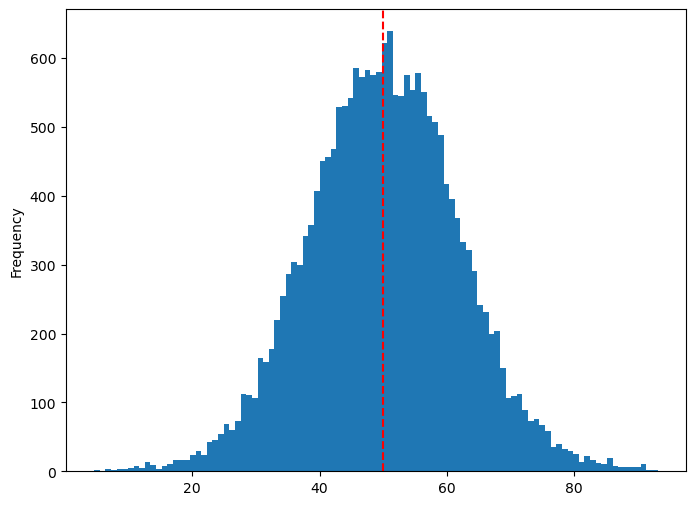

In [58]:
df['rsi'].plot(kind='hist', bins=100, figsize=(8, 6))
plt.axvline(50, color='red', linestyle='--')

**Plot close price vs RSI for a time period**

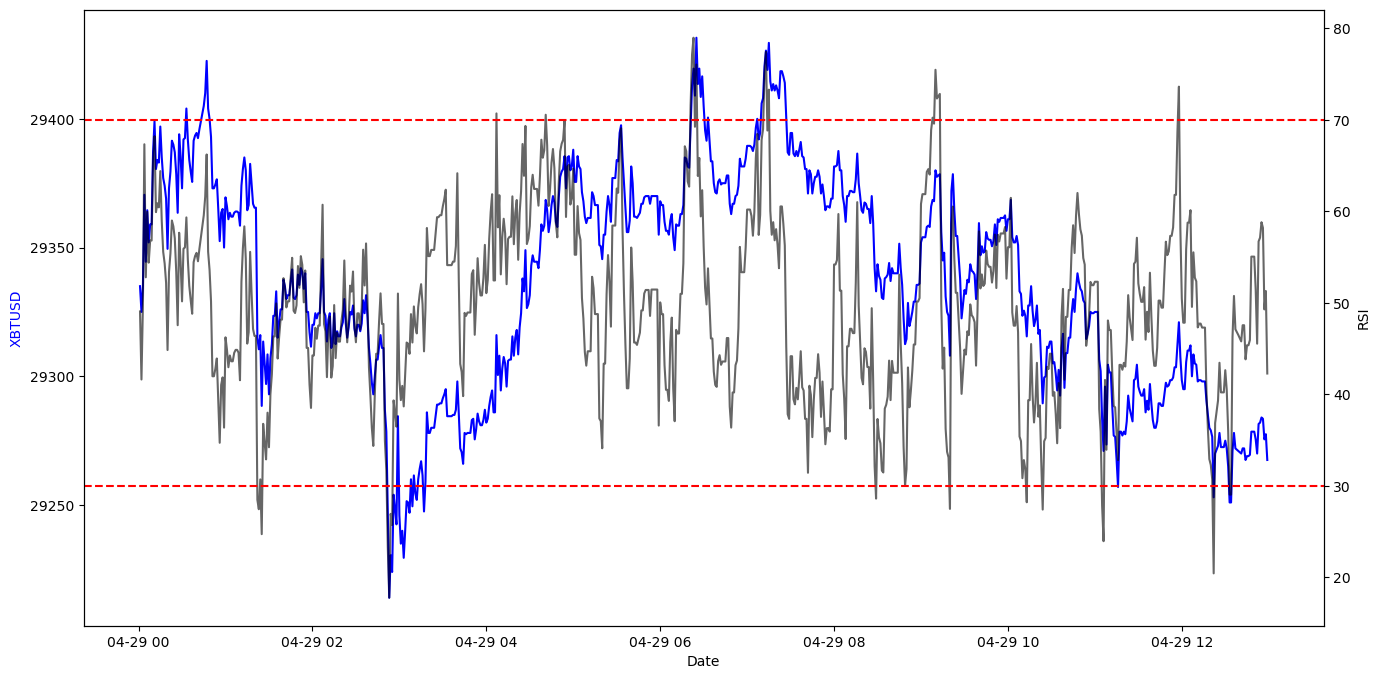

In [49]:
start_time = datetime.datetime(2023, 4, 29, 0)
end_time = datetime.datetime(2023, 4, 29, 13)

xf = df[(df['time'] > start_time) & (df['time'] < end_time)]

fig, ax1 = plt.subplots(figsize=(16, 8))
ax2 = ax1.twinx()

ax1.plot(xf['time'], xf['close'], 'b-')
ax2.plot(xf['time'], xf['rsi'], 'k-', alpha=0.6)

ax1.set_xlabel('Date')
ax1.set_ylabel('XBTUSD', color='b')
ax2.set_ylabel('RSI', color='k')

ax2.axhline(70, color='red', linestyle='--')
ax2.axhline(30, color='red', linestyle='--')

**Trade programmatically using CCXT library**

In [50]:
API = ccxt.bitmex({'apiKey':'Ds9XugYf2Luk282-1RTAO0wb', 'secret':'CE7m1gliS0H1HWMhoB6qqbFazQQhDAWr1xZTr7HLmWejsxl9'})

**Load historical candle data from API**

In [51]:
# Get previous trades in time buckets.

candles = API.publicGetTradeBucketed(params={
    'binSize': '1m',
    'symbol': 'XBTUSD',
    'reverse': True
})

candles[:2]

[{'timestamp': '2023-04-29T12:23:00.000Z',
  'symbol': 'XBTUSD',
  'open': '29312',
  'high': '29312.5',
  'low': '29312',
  'close': '29312.5',
  'trades': '18',
  'volume': '209600',
  'vwap': '29312.5',
  'lastSize': '300',
  'turnover': '715052646',
  'homeNotional': '7.15052646',
  'foreignNotional': '209600'},
 {'timestamp': '2023-04-29T12:22:00.000Z',
  'symbol': 'XBTUSD',
  'open': '29318',
  'high': '29317',
  'low': '29312',
  'close': '29312',
  'trades': '42',
  'volume': '175200',
  'vwap': '29316.25',
  'lastSize': '500',
  'turnover': '597622837',
  'homeNotional': '5.97622837',
  'foreignNotional': '175200'}]

**RSI strategy idea**

In [62]:
def iso_to_unix(ts):
    return round(1000 * dateutil.parser.parse(ts).timestamp())

candle = {iso_to_unix(c['timestamp']): c['close'] for c in candles}
times, closes = zip(*sorted(candle.items()))

In [56]:
def hypo_rsi(closes, ret):
    return RSI(np.append(np.float64(closes), [np.float64(closes[-1]) * (1 + ret)]))[-1]


returns = np.linspace(-.02, .02, 100)
rsi_data = [hypo_rsi(closes, r) for r in returns]

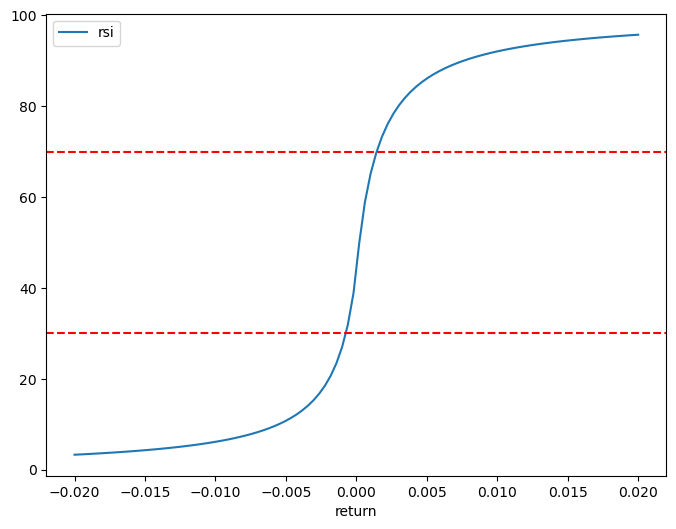

In [57]:
rsi = pd.DataFrame({'return': returns, 'rsi': rsi_data})

rsi.plot(x='return', y='rsi', figsize=(8, 6))
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='red', linestyle='--')

In [59]:
func = interp1d(rsi_data, returns, kind='cubic')

func(30), func(70)

(array(-0.00074649), array(0.00144003))